In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv("C:/Users/angel/Downloads/Task 7- United States Stocks.csv")

In [4]:
df

,Name,Last,High,Low,Chg.,Chg...,Vol
0,Boeing,209.16,211.41,207.91,-0.06,-0.03,4310000.0
1,General Motors,38.56,38.97,38.45,-0.09,-0.23,11720000.0
2,Chevron,151.02,155.31,150.99,-3.04,-1.97,8040000.0
3,Citigroup,53.98,54.44,53.53,-0.31,-0.57,11750000.0
4,Bank of America,33.05,33.25,32.83,-0.07,-0.20,30560000.0
...,...,...,...,...,...,...,...
498,Constellation Energy,132.17,132.51,130.00,1.45,1.11,827840.0
499,GE HealthCare,81.34,82.75,80.61,-0.72,-0.88,2700000.0
500,Kenvue,19.32,19.61,19.08,-0.01,-0.03,24460000.0
501,Veralto,82.17,83.55,81.99,-0.39,-0.47,1180000.0


In [5]:
df.head()

,Name,Last,High,Low,Chg.,Chg...,Vol
0,Boeing,209.16,211.41,207.91,-0.06,-0.03,4310000.0
1,General Motors,38.56,38.97,38.45,-0.09,-0.23,11720000.0
2,Chevron,151.02,155.31,150.99,-3.04,-1.97,8040000.0
3,Citigroup,53.98,54.44,53.53,-0.31,-0.57,11750000.0
4,Bank of America,33.05,33.25,32.83,-0.07,-0.20,30560000.0


In [6]:
df.isna()

,Name,Last,High,Low,Chg.,Chg...,Vol
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
498,False,False,False,False,False,False,False
499,False,False,False,False,False,False,False
500,False,False,False,False,False,False,False
501,False,False,False,False,False,False,False


In [7]:
# 2. Remove Duplicates 
df = df.drop_duplicates()

In [8]:
df

,Name,Last,High,Low,Chg.,Chg...,Vol
0,Boeing,209.16,211.41,207.91,-0.06,-0.03,4310000.0
1,General Motors,38.56,38.97,38.45,-0.09,-0.23,11720000.0
2,Chevron,151.02,155.31,150.99,-3.04,-1.97,8040000.0
3,Citigroup,53.98,54.44,53.53,-0.31,-0.57,11750000.0
4,Bank of America,33.05,33.25,32.83,-0.07,-0.20,30560000.0
...,...,...,...,...,...,...,...
498,Constellation Energy,132.17,132.51,130.00,1.45,1.11,827840.0
499,GE HealthCare,81.34,82.75,80.61,-0.72,-0.88,2700000.0
500,Kenvue,19.32,19.61,19.08,-0.01,-0.03,24460000.0
501,Veralto,82.17,83.55,81.99,-0.39,-0.47,1180000.0


In [9]:
df.describe()

,Chg.,Chg...,Vol
count,503.000000,503.000000,5.030000e+02
mean,0.315924,0.155686,4.257640e+06
std,6.675989,1.698021,7.945047e+06
min,-82.040000,-17.780000,1.493000e+04
25%,-0.410000,-0.455000,8.966250e+05
50%,0.210000,0.250000,1.740000e+06
75%,1.220000,0.845000,4.020000e+06
max,47.220000,6.870000,8.361000e+07


In [10]:
# Convert 'Chg%' to numeric
df['Chg.'] = pd.to_numeric(df['Chg.'], errors='coerce')


In [11]:
df['Chg.']

0     -0.06
1     -0.09
2     -3.04
3     -0.31
4     -0.07
       ... 
498    1.45
499   -0.72
500   -0.01
501   -0.39
502    5.42
Name: Chg., Length: 503, dtype: float64

In [12]:
df['Chg...'] = pd.to_numeric(df['Chg...'], errors='coerce')


In [13]:
df['Chg...']

0     -0.03
1     -0.23
2     -1.97
3     -0.57
4     -0.20
       ... 
498    1.11
499   -0.88
500   -0.03
501   -0.47
502    1.31
Name: Chg..., Length: 503, dtype: float64

In [14]:
# Example: Removing extreme outliers in 'Chg%'
Q1 = df['Chg.'].quantile(0.25)
Q3 = df['Chg.'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Chg.'] < (Q1 - 1.5 * IQR)) | (df['Chg.'] > (Q3 + 1.5 * IQR)))]


In [15]:
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')


C:\Users\angel\AppData\Local\Temp\ipykernel_35724\887248283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['High'] = pd.to_numeric(df['High'], errors='coerce')
C:\Users\angel\AppData\Local\Temp\ipykernel_35724\887248283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Low'] = pd.to_numeric(df['Low'], errors='coerce')


In [16]:
# Standardize column names
#df.columns = df.columns.str.replace(' ', '_').str.lower()


In [17]:
df['Price_Range'] = df['High'] - df['Low']
print(df[['Name', 'High', 'Low', 'Price_Range']])


                     Name    High     Low  Price_Range
0                  Boeing  211.41  207.91         3.50
1          General Motors   38.97   38.45         0.52
3               Citigroup   54.44   53.53         0.91
4         Bank of America   33.25   32.83         0.42
5                    AT&T   16.88   16.57         0.31
..                    ...     ...     ...          ...
496                Howmet   59.36   58.56         0.80
498  Constellation Energy  132.51  130.00         2.51
499         GE HealthCare   82.75   80.61         2.14
500                Kenvue   19.61   19.08         0.53
501               Veralto   83.55   81.99         1.56

[427 rows x 4 columns]


C:\Users\angel\AppData\Local\Temp\ipykernel_35724\690107267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price_Range'] = df['High'] - df['Low']


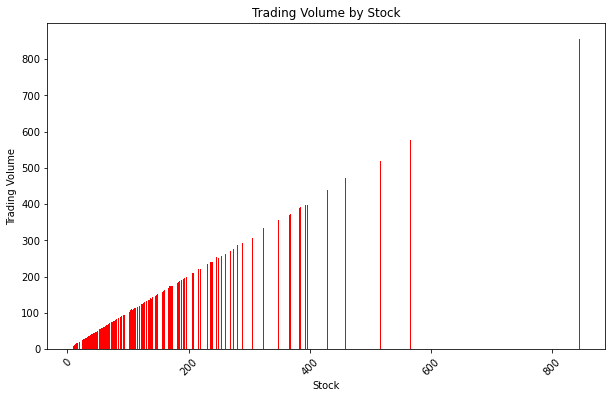

In [21]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 6))
plt.bar(df['Low'], df['High'], color='Red')
plt.xlabel('Stock')
plt.ylabel('Trading Volume')
plt.title('Trading Volume by Stock') 
plt.xticks(rotation=45) 
plt.show()

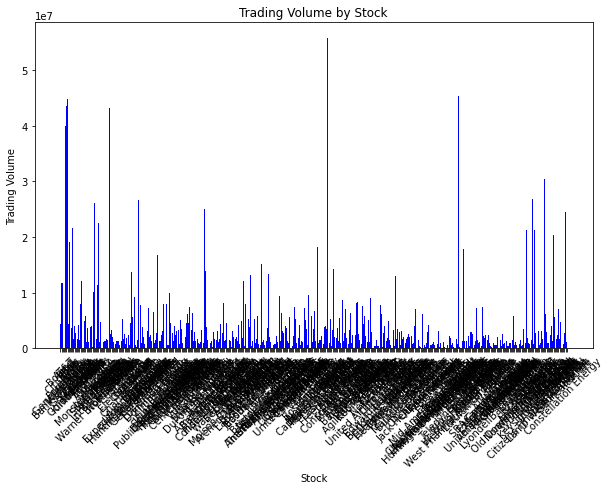

In [22]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 6))
plt.bar(df['Name'], df['Vol'], color='blue')
plt.xlabel('Stock')
plt.ylabel('Trading Volume')
plt.title('Trading Volume by Stock') 
plt.xticks(rotation=45) 
plt.show()

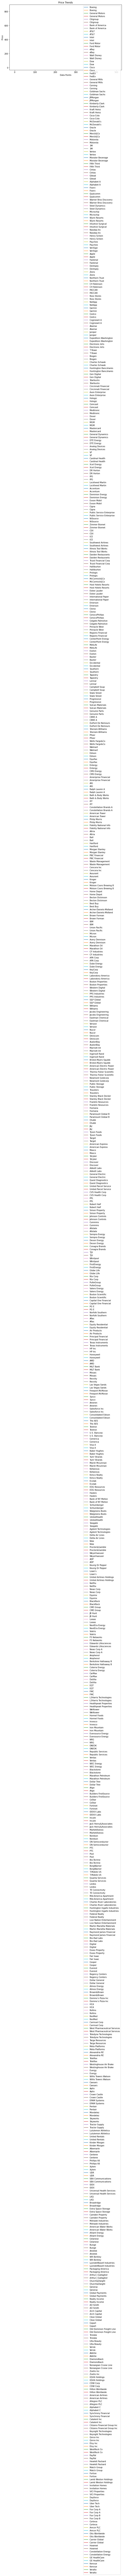

In [24]:
plt.figure(figsize=(10, 6))
for stock in df['Name']:
    plt.plot(df[df['Name'] == stock][['High','Low']], label=stock)
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Price Trends')
plt.legend()
plt.show()
